<a href="https://colab.research.google.com/github/wdwzyyg/ECE532Project/blob/main/Method2_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import scipy.io as sio

import time
from google.colab import output

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
feature = np.load('/content/drive/MyDrive/ECE532/Project/Featurization Result/features_Xception.npy')
flattened_features = feature.reshape(*feature.shape[0:1],-1, *feature.shape[3:4]) # -1 means the unknown new axis

# the SVM function cross_val_score need imput <= 2 dimention, so flat all the features for each sample. 
feature_2D = feature.reshape( *feature.shape[0:1],-1)
labels = np.asarray(np.load('/content/drive/MyDrive/ECE532/Project/Featurization Result/raw_y_train.npy'))

weights: 'uniform' or 'distance'

In [4]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
cv_score = []
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model_knn, feature_2D, 
                             labels, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())
    print("Done: K = ",k)
print(cv_score)

Done: K =  1
Done: K =  3
Done: K =  5
Done: K =  7
Done: K =  9
Done: K =  11
Done: K =  13
Done: K =  15
Done: K =  17
Done: K =  19
Done: K =  21
[0.39828333427140206, 0.4411887206619013, 0.4411887206619013, 0.4571190033958087, 0.46630644828427237, 0.4669330781786458, 0.47919738841672765, 0.47186356728766815, 0.47981838989887626, 0.4822705014915292, 0.4798146376240596]


In [6]:
neighbors = [22,23,25,27]
cv_score_2 = []
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_vawe l_score(model_knn, feature_2D, 
                             labels, cv=5, scoring='accuracy')
    cv_score_2.append(scores.mean())
    print("Done: K = ",k)
print(cv_score_2)


Done: K =  22
Done: K =  23
Done: K =  25
Done: K =  27
[0.4761467889908257, 0.477983527513555, 0.48103037466464044, 0.4847076039849158]


1

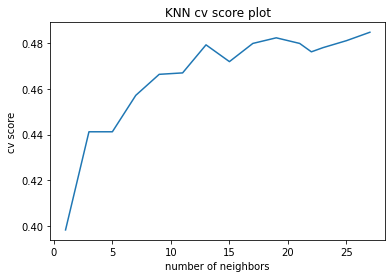

In [10]:
c = [0.39828333427140206, 0.4411887206619013, 0.4411887206619013, 0.4571190033958087, 
     0.46630644828427237, 0.4669330781786458, 0.47919738841672765, 0.47186356728766815, 
     0.47981838989887626, 0.4822705014915292, 0.4798146376240596,0.4761467889908257, 
     0.477983527513555, 0.48103037466464044, 0.4847076039849158]
neighbors = [1,3,5,7,9,11,13,15,17,19,21,22,23,25,27]
plt.plot(neighbors, c)
plt.xlabel('number of neighbors')
plt.ylabel('cv score')
plt.title('KNN cv score plot')
optimal_k = neighbors[c.index(min(c))]
optimal_k

In [ ]:
# fit model and get accuracy score using optimum k. 
neighbors = optimal_k
model_knn = KNeighborsClassifier(n_neighbors = neighbors)
model_knn.fit(X_trainFlat, Y_train)
pred = model_knn.predict(X_testFlat)
print(metrics.accuracy_score(Y_test, pred))